<a href="https://colab.research.google.com/github/LucVerGit/EntrevoisinLuc/blob/master/Project3AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import plotly.graph_objects as go
fig = go.Figure()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

import seaborn as sns; sns.set_theme(color_codes=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Load data

df = pd.read_csv('/content/drive/MyDrive/Notebook_pyton/fr-openfoodfacts-org-products.csv' ,sep= '\t' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,248939.0,1.936024,2.502019,0.0,0.00,1.00,3.0,31.0
ingredients_from_palm_oil_n,248939.0,0.019659,0.140524,0.0,0.00,0.00,0.0,2.0
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,0.269207,0.0,0.00,0.00,0.0,6.0
...,...,...,...,...,...,...,...,...
carbon-footprint_100g,268.0,341.700764,425.211439,0.0,98.75,195.75,383.2,2842.0
nutrition-score-fr_100g,221210.0,9.165535,9.055903,-15.0,1.00,10.00,16.0,40.0
nutrition-score-uk_100g,221210.0,9.058049,9.183589,-15.0,1.00,9.00,16.0,40.0
glycemic-index_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes
df.notna().sum()
df.notna().sum(axis=1)

0         17
1         38
2         40
3         36
4         27
          ..
320767    19
320768    45
320769    29
320770    17
320771    33
Length: 320772, dtype: int64

In [ ]:
for col in df.columns:
    print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

## répartition des différentes colonnes du jeu de données

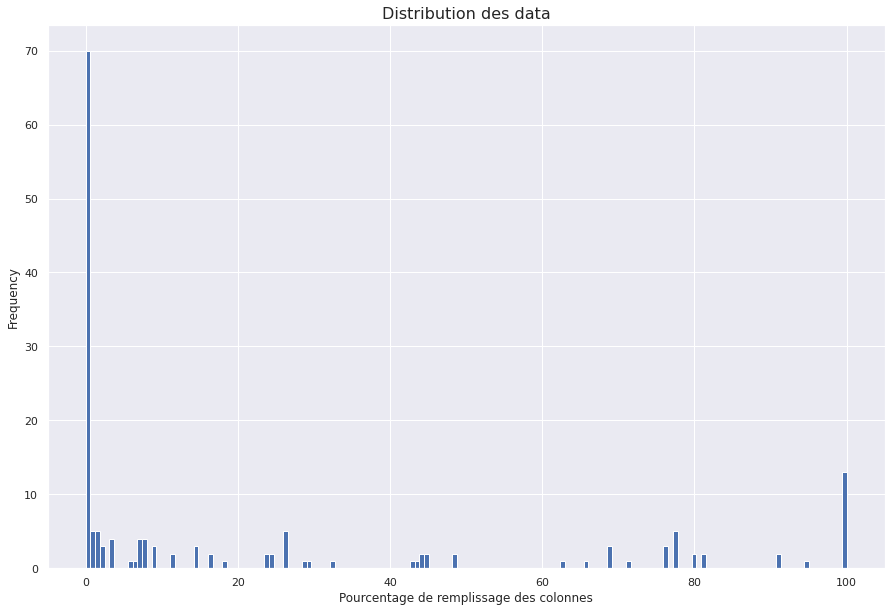

In [ ]:
def plot_distribution_empty_value(data):
    notna = ((data.notna().sum()/data.shape[0])*100).sort_values(ascending=False)
    notna.plot(kind="hist",figsize=(15,10),bins=notna.shape[0])
    plt.title("Distribution des data",fontsize=16)
    plt.xlabel("Pourcentage de remplissage des colonnes")
    plt.show()

plot_distribution_empty_value(df)

todo squellette de markdown
trello

In [ ]:
 #filtre les colonnes avec un pourcentage de val non Nan
def filter_col_rate_notna(data,rate_na_row_min=0.8):
    if type(data) != type(pd.DataFrame()):
        raise ValueError(f"data n\'est pas un DataFrame pandas mais de type {type(data)}!")
    
    return data[data.columns[data.isna().sum()/data.shape[0] <= rate_na_row_min]].copy()


##STEP1 **STEP1 **
Le nettoyage des données est complet si :

x les éventuelles valeurs manquantes de chaque colonnes ont été identifiées, quantifiées et traitées. Il est attendu la mise en œuvre d’au moins 3 méthodes de traitement des valeurs manquantes, adaptées aux variables concernées (médiane, mise à 0, IterativeImputer, KNN, suppression, …).

x pour chaque variable, les éventuels outliers d’un point de vue statistique ont été mis en évidence et analysés, afin de s’assurer s’il s’agit de valeurs aberrantes ou atypiques. Les éventuelles valeurs aberrantes ont été identifiées, quantifiées et traitées, en tenant compte du contexte métier

x (Es-que la heat map is best idea ?) les variables non pertinentes pour la problématique de l'application ont été éliminées.

(X)les lignes dupliquées ont été identifiées, quantifiées et traitées.

 (X) au moins une fonction a été écrite, testée et utilisée pour nettoyer le jeu de données.


Le nettoyage des données est pertinent si :
 (X) une méthodologie de traitement des valeurs manquantes pour chaque colonne est justifiée et mise en oeuvre (ex : remplacer les valeurs manquantes d’une colonne par la valeur moyenne de la colonne)
(X) une méthodologie de traitement des lignes dupliquées est justifiée et mise en oeuvre (ex : les lignes doublons ont été supprimés).


Le nettoyage des données est présentable si :
(X) les fonctionnalités d’édition de cellule Markdown du Jupyter Notebook sont utilisées dans au moins trois cellules pour décrire les choix méthodologiques et rendre lisible le document (titres, mise en forme, alternance de cellule d’exécution de code Python et de cellule de texte explicatif) 

(X)la démarche de nettoyage des données est visible dans la structure du document (découpage du document en partie avec des titres clairs et mis en évidence, des commentaires à l’intérieur des parties pour expliciter la démarche, …)

In [ ]:
df['energy_100g']

0            NaN
1         2243.0
2         1941.0
3         2540.0
4         1552.0
           ...  
320767       NaN
320768       0.0
320769       NaN
320770       NaN
320771    2092.0
Name: energy_100g, Length: 320772, dtype: float64

# **On nettoie le jeu de donnée**


In [ ]:
original_data = df
print(f'Dimensions initiale du jeu de données: {original_data.shape}')
start_row,start_col= original_data.shape


Dimensions initiale du jeu de données: (320772, 162)


afficher valeur null

In [ ]:
df.isna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
320768,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
320769,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
320770,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True


Quantifier le nombre de lignes nulles

In [ ]:
df.isna().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

TODO psedo code 
for col in df.columns:
    
        if  col.headname()  == '100g' 
          df['col'].fillna(value=df['col'].mean(), inplace=True)


          for col in df.columns:
  if '100g' in col:
    df[col].fillna(...)

numeric_cols = ['energy_100g', 'fat_100g']

# Soit on applique a un groupe de colonnes.
df[numeric_cols] = pd.to_numeric(df[numeric_cols], errors='coerce')

# Soit on itère et on applique colonne par colonne.
for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:


df['energy_100g'].fillna(value=df['energy_100g'].mean(), inplace=True)
df['energy-from-fat_100g'].fillna(value=df['energy-from-fat_100g'].mean(), inplace=True)
df['fat_100g'].fillna(value=df['fat_100g'].mean(), inplace=True)
df['saturated-fat_100g'].fillna(value=df['saturated-fat_100g'].mean(), inplace=True)
df['butyric-acid_100g'].fillna(value=df['butyric-acid_100g'].mean(), inplace=True)
df['caproic-acid_100g'].fillna(value=df['caproic-acid_100g'].mean(), inplace=True)
df['caprylic-acid_100g'].fillna(value=df['caprylic-acid_100g'].mean(), inplace=True)
df['capric-acid_100g'].fillna(value=df['capric-acid_100g'].mean(), inplace=True)
df['lauric-acid_100g'].fillna(value=df['lauric-acid_100g'].mean(), inplace=True)
df['myristic-acid_100g'].fillna(value=df['myristic-acid_100g'].mean(), inplace=True)
df['palmitic-acid_100g'].fillna(value=df['palmitic-acid_100g'].mean(), inplace=True)
df['stearic-acid_100g'].fillna(value=df['stearic-acid_100g'].mean(), inplace=True)
df['arachidic-acid_100g'].fillna(value=df['arachidic-acid_100g'].mean(), inplace=True)
df['behenic-acid_100g'].fillna(value=df['behenic-acid_100g'].mean(), inplace=True)
df['lignoceric-acid_100g'].fillna(value=df['lignoceric-acid_100g'].mean(), inplace=True)
df['cerotic-acid_100g'].fillna(value=df['cerotic-acid_100g'].mean(), inplace=True)
df['montanic-acid_100g'].fillna(value=df['montanic-acid_100g'].mean(), inplace=True)
df['melissic-acid_100g'].fillna(value=df['melissic-acid_100g'].mean(), inplace=True)
df['monounsaturated-fat_100g'].fillna(value=df['monounsaturated-fat_100g'].mean(), inplace=True)
df['polyunsaturated-fat_100g'].fillna(value=df['polyunsaturated-fat_100g'].mean(), inplace=True)
df['omega-3-fat_100g'].fillna(value=df['omega-3-fat_100g'].mean(), inplace=True)
df['alpha-linolenic-acid_100g'].fillna(value=df['alpha-linolenic-acid_100g'].mean(), inplace=True)
df['eicosapentaenoic-acid_100g'].fillna(value=df['eicosapentaenoic-acid_100g'].mean(), inplace=True)
df['docosahexaenoic-acid_100g'].fillna(value=df['docosahexaenoic-acid_100g'].mean(), inplace=True)
df['omega-6-fat_100g'].fillna(value=df['omega-6-fat_100g'].mean(), inplace=True)
df['linoleic-acid_100g'].fillna(value=df['linoleic-acid_100g'].mean(), inplace=True)
df['arachidonic-acid_100g'].fillna(value=df['arachidonic-acid_100g'].mean(), inplace=True)
df['gamma-linolenic-acid_100g'].fillna(value=df['gamma-linolenic-acid_100g'].mean(), inplace=True)
df['dihomo-gamma-linolenic-acid_100g'].fillna(value=df['dihomo-gamma-linolenic-acid_100g'].mean(), inplace=True)
df['omega-9-fat_100g'].fillna(value=df['omega-9-fat_100g'].mean(), inplace=True)
df['oleic-acid_100g'].fillna(value=df['oleic-acid_100g'].mean(), inplace=True)
df['elaidic-acid_100g'].fillna(value=df['elaidic-acid_100g'].mean(), inplace=True)
df['gondoic-acid_100g'].fillna(value=df['gondoic-acid_100g'].mean(), inplace=True)
df['mead-acid_100g'].fillna(value=df['mead-acid_100g'].mean(), inplace=True)
df['erucic-acid_100g'].fillna(value=df['erucic-acid_100g'].mean(), inplace=True)
df['nervonic-acid_100g'].fillna(value=df['nervonic-acid_100g'].mean(), inplace=True)
df['trans-fat_100g'].fillna(value=df['trans-fat_100g'].mean(), inplace=True)
df['cholesterol_100g'].fillna(value=df['cholesterol_100g'].mean(), inplace=True)
df['carbohydrates_100g'].fillna(value=df['carbohydrates_100g'].mean(), inplace=True)
df['sugars_100g'].fillna(value=df['sugars_100g'].mean(), inplace=True)
df['sucrose_100g'].fillna(value=df['sucrose_100g'].mean(), inplace=True)
df['glucose_100g'].fillna(value=df['glucose_100g'].mean(), inplace=True)
df['fructose_100g'].fillna(value=df['fructose_100g'].mean(), inplace=True)
df['lactose_100g'].fillna(value=df['lactose_100g'].mean(), inplace=True)
df['maltose_100g'].fillna(value=df['maltose_100g'].mean(), inplace=True)
df['maltodextrins_100g'].fillna(value=df['maltodextrins_100g'].mean(), inplace=True)
df['starch_100g'].fillna(value=df['starch_100g'].mean(), inplace=True)
df['polyols_100g'].fillna(value=df['polyols_100g'].mean(), inplace=True)
df['fiber_100g'].fillna(value=df['fiber_100g'].mean(), inplace=True)
df['proteins_100g'].fillna(value=df['proteins_100g'].mean(), inplace=True)
df['casein_100g'].fillna(value=df['casein_100g'].mean(), inplace=True)
df['serum-proteins_100g'].fillna(value=df['serum-proteins_100g'].mean(), inplace=True)
df['nucleotides_100g'].fillna(value=df['nucleotides_100g'].mean(), inplace=True)
df['salt_100g'].fillna(value=df['salt_100g'].mean(), inplace=True)
df['sodium_100g'].fillna(value=df['sodium_100g'].mean(), inplace=True)
df['alcohol_100g'].fillna(value=df['alcohol_100g'].mean(), inplace=True)
df['vitamin-a_100g'].fillna(value=df['vitamin-a_100g'].mean(), inplace=True)
df['beta-carotene_100g'].fillna(value=df['beta-carotene_100g'].mean(), inplace=True)
df['vitamin-d_100g'].fillna(value=df['vitamin-d_100g'].mean(), inplace=True)
df['vitamin-e_100g'].fillna(value=df['vitamin-e_100g'].mean(), inplace=True)
df['vitamin-k_100g'].fillna(value=df['vitamin-k_100g'].mean(), inplace=True)
df['vitamin-c_100g'].fillna(value=df['vitamin-c_100g'].mean(), inplace=True)
df['vitamin-b1_100g'].fillna(value=df['vitamin-b1_100g'].mean(), inplace=True)
df['vitamin-b2_100g'].fillna(value=df['vitamin-b2_100g'].mean(), inplace=True)
df['vitamin-pp_100g'].fillna(value=df['vitamin-pp_100g'].mean(), inplace=True)
df['vitamin-b6_100g'].fillna(value=df['vitamin-b6_100g'].mean(), inplace=True)
df['vitamin-b9_100g'].fillna(value=df['vitamin-b9_100g'].mean(), inplace=True)
df['folates_100g'].fillna(value=df['folates_100g'].mean(), inplace=True)
df['vitamin-b12_100g'].fillna(value=df['vitamin-b12_100g'].mean(), inplace=True)
df['biotin_100g'].fillna(value=df['biotin_100g'].mean(), inplace=True)
df['pantothenic-acid_100g'].fillna(value=df['pantothenic-acid_100g'].mean(), inplace=True)
df['silica_100g'].fillna(value=df['silica_100g'].mean(), inplace=True)
df['bicarbonate_100g'].fillna(value=df['bicarbonate_100g'].mean(), inplace=True)
df['potassium_100g'].fillna(value=df['potassium_100g'].mean(), inplace=True)
df['chloride_100g'].fillna(value=df['chloride_100g'].mean(), inplace=True)
df['calcium_100g'].fillna(value=df['calcium_100g'].mean(), inplace=True)
df['phosphorus_100g'].fillna(value=df['phosphorus_100g'].mean(), inplace=True)
df['iron_100g'].fillna(value=df['iron_100g'].mean(), inplace=True)
df['magnesium_100g'].fillna(value=df['magnesium_100g'].mean(), inplace=True)
df['zinc_100g'].fillna(value=df['zinc_100g'].mean(), inplace=True)
df['copper_100g'].fillna(value=df['copper_100g'].mean(), inplace=True)
df['manganese_100g'].fillna(value=df['manganese_100g'].mean(), inplace=True)
df['fluoride_100g'].fillna(value=df['fluoride_100g'].mean(), inplace=True)
df['selenium_100g'].fillna(value=df['selenium_100g'].mean(), inplace=True)
df['chromium_100g'].fillna(value=df['chromium_100g'].mean(), inplace=True)
df['molybdenum_100g'].fillna(value=df['molybdenum_100g'].mean(), inplace=True)
df['iodine_100g'].fillna(value=df['iodine_100g'].mean(), inplace=True)
df['caffeine_100g'].fillna(value=df['caffeine_100g'].mean(), inplace=True)
df['taurine_100g'].fillna(value=df['taurine_100g'].mean(), inplace=True)
df['ph_100g'].fillna(value=df['ph_100g'].mean(), inplace=True)
df['fruits-vegetables-nuts_100g'].fillna(value=df['fruits-vegetables-nuts_100g'].mean(), inplace=True)
df['collagen-meat-protein-ratio_100g'].fillna(value=df['collagen-meat-protein-ratio_100g'].mean(), inplace=True)
df['cocoa_100g'].fillna(value=df['cocoa_100g'].mean(), inplace=True)
df['chlorophyl_100g'].fillna(value=df['chlorophyl_100g'].mean(), inplace=True)
df['carbon-footprint_100g'].fillna(value=df['carbon-footprint_100g'].mean(), inplace=True)
df['nutrition-score-fr_100g'].fillna(value=df['nutrition-score-fr_100g'].mean(), inplace=True)
df['nutrition-score-uk_100g'].fillna(value=df['nutrition-score-uk_100g'].mean(), inplace=True)
df['glycemic-index_100g'].fillna(value=df['glycemic-index_100g'].mean(), inplace=True)
df['water-hardness_100g'].fillna(value=df['water-hardness_100g'].mean(), inplace=True)

In [ ]:
# Suppressions des colonnes contenant au moins de 80% de valeur non vide 
clean_data = filter_col_rate_notna(original_data,rate_na_row_min=0.8)
# Suppressions des lignes sans données.
clean_data.dropna(how='all',inplace=True)

In [ ]:
print("Liste des lignes totalement dupliquées :")
clean_data[clean_data.duplicated(keep=False)]

Liste des lignes totalement dupliquées :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


In [ ]:
# Supp  lignes dupliquées 
clean_data.drop_duplicates(keep="first", inplace=True)
# Supp lignes  vide
clean_data = clean_data[clean_data["product_name"].notna()]
end_row,end_col= clean_data.shape
print("Nombre de lignes supprimées:",start_row - end_row)
print("Nombre de colonnes supprimées:",start_col - end_col)
print("Colonnes supprimées:",[col for col in original_data
                                  if col not in clean_data])
print("\nNouvelle dimensions du jeu de données:",clean_data.shape)

Nombre de lignes supprimées: 17762
Nombre de colonnes supprimées: 38
Colonnes supprimées: ['generic_name', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'butyric-acid_100g', 'caproic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'melissic-acid_100g', 'elaidic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g']

Nouvelle dimensions du jeu de données: (303010, 124)


In [ ]:
#carte de chaleur
def plot_heatmap(data,xlabel,ylabel,title,
                 colorbar_display=False,label_colorbar="Répartition",fmt="f",annot=True,linewidths=.1):
    plt.figure(figsize=(15,10))
    if annot:
        ax = sns.heatmap(data,linewidths=linewidths,annot=annot,fmt=fmt,cbar=colorbar_display)
    else:
        ax = sns.heatmap(data,linewidths=linewidths,annot=annot,cbar=colorbar_display)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if colorbar_display:
        ax.collections[0].colorbar.set_label(label_colorbar)
    plt.show()


In [ ]:
df.nunique()

code                       52773
url                        52773
creator                     2029
created_t                  52729
created_datetime           52722
                           ...  
carbon-footprint_100g        148
nutrition-score-fr_100g       54
nutrition-score-uk_100g       52
glycemic-index_100g            0
water-hardness_100g            0
Length: 162, dtype: int64

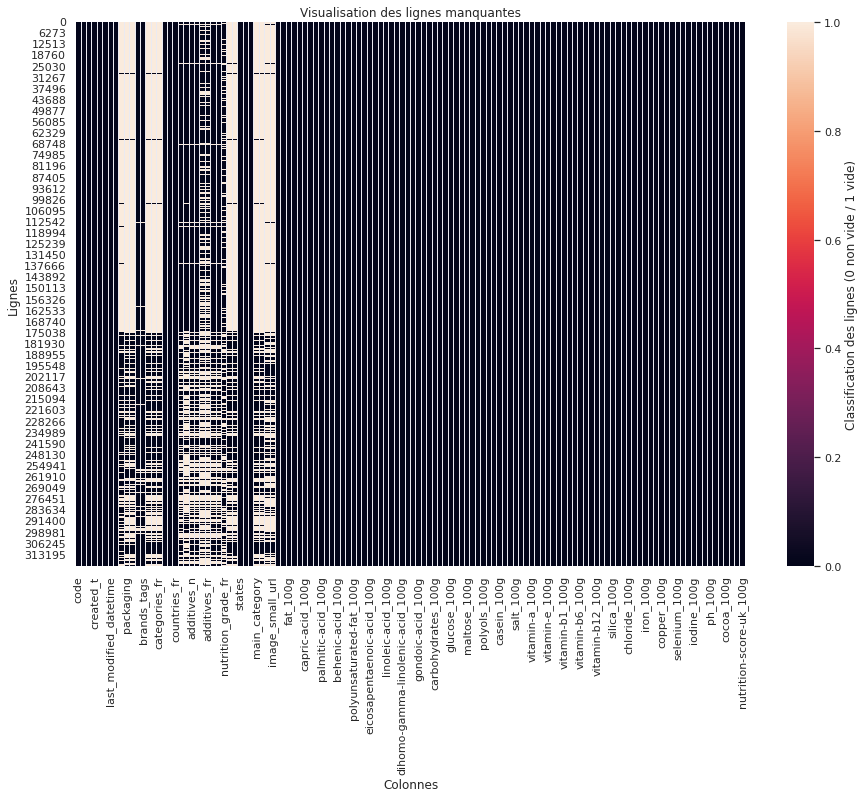

In [ ]:
plot_heatmap(clean_data.isna(),
             "Colonnes",
             "Lignes",
             "Visualisation des lignes manquantes",
             colorbar_display=True,
             label_colorbar="Classification des lignes (0 non vide / 1 vide)",
             annot=False,
            linewidths=0)

##Doublons
On commence par uniformiser la colonne product_name (lowercase) pour ne pas passer à coté de doublons sur des syntaxes différentes puis on analyse les doublons pour appliquer une stratégie afin de les supprimer

Afficher les valeur dupliquer

In [ ]:
df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
320767    False
320768    False
320769    False
320770    False
320771    False
Length: 320772, dtype: bool

Quantifier les valeur dupliquer

In [ ]:
print(df.isnull().sum().all)

<bound method NDFrame._add_numeric_operations.<locals>.all of code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g           0
nutrition-score-fr_100g         0
nutrition-score-uk_100g         0
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64>


Drop les valeur dupliquer

In [ ]:
df=df.drop_duplicates(keep='first')

###Nettoyage des aberrations

Afficher les datas non null

In [ ]:
# Filtered generic_name in fr_openfoodfacts_org_products_2
df = df[df['generic_name'].notnull()]


# Analyse préliminaire

La colonne nutriscore_grade contient un total de 257648 lignes et 11268 lignes vides soit moiter  de lignes vides.


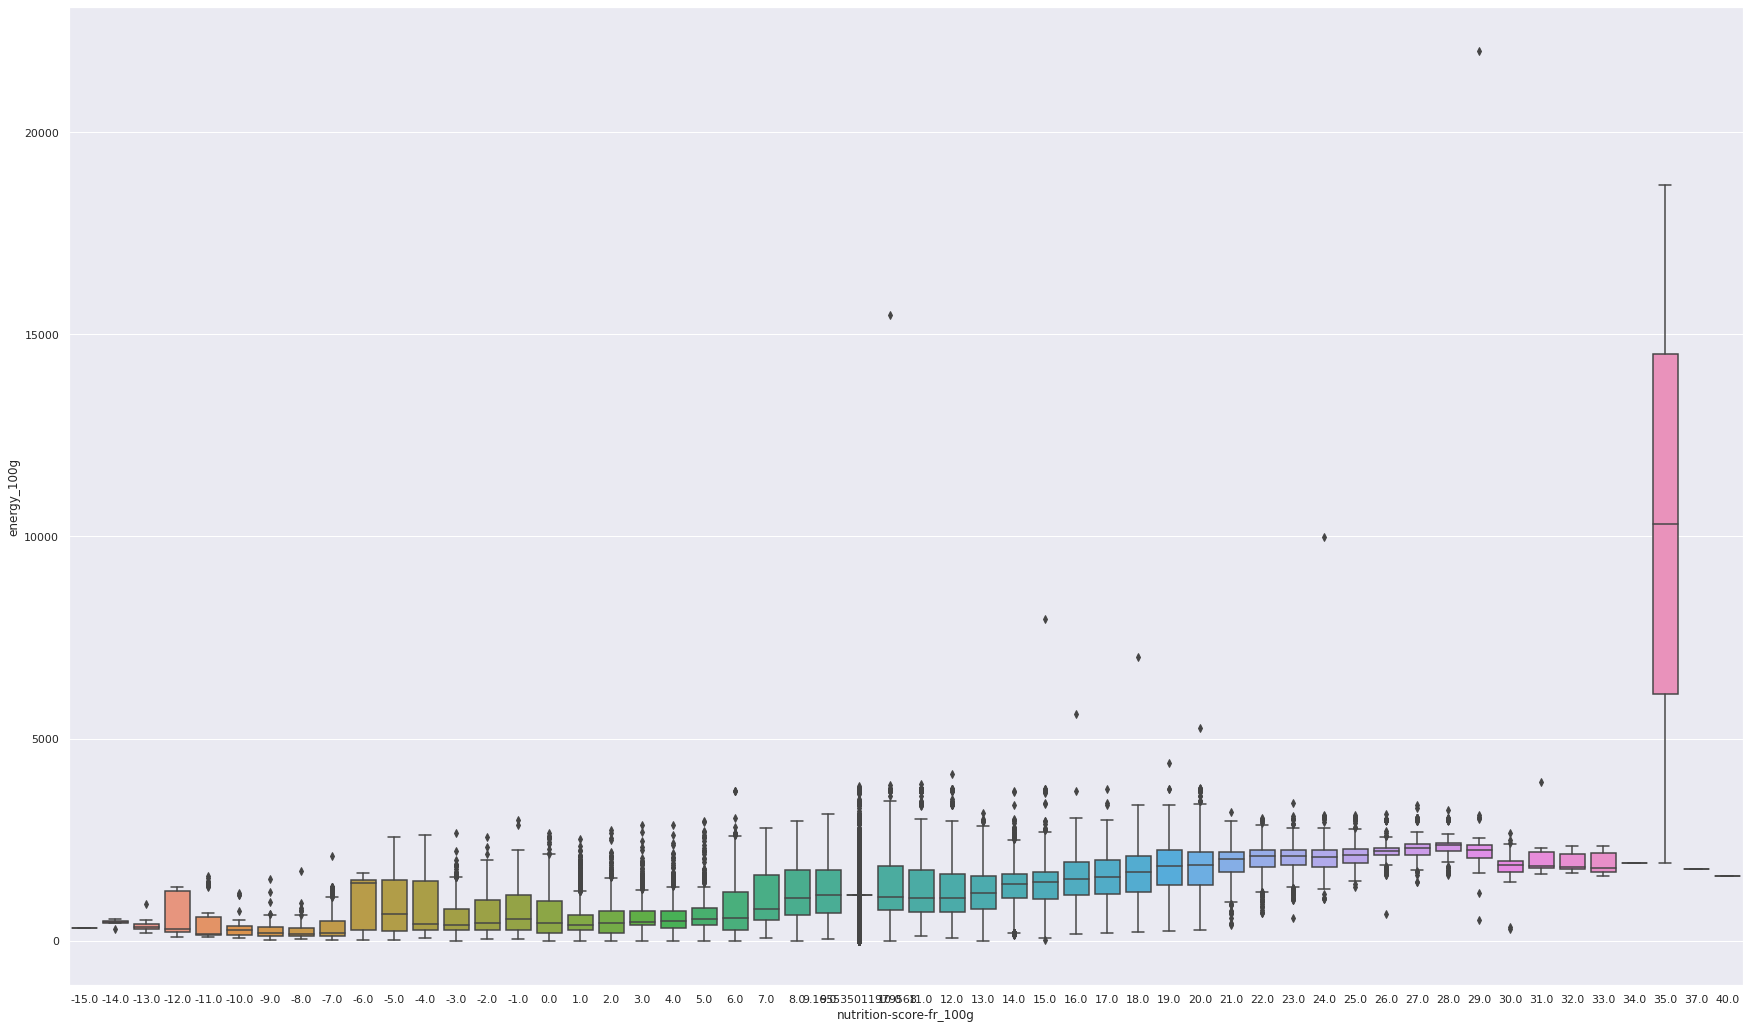

In [ ]:
plt.figure(figsize=(30,18))
sns.boxplot(x="nutrition-score-fr_100g", y="energy_100g", data=df)


grasse a se diagrame on peux remarquer les nutri score au dela de 33 sont aberant on peux apliquer un filtre pour gere aberation.

POUR metre en evidance les valeur aberante et les remlacer il faut traiter les valeur numerique  


In [ ]:
# Iterative Imputation
group1 = ['correlated', 'collumns', 'from', 'group', '1']
group2 = ['correlated', 'collumns', 'from', 'group', '2']

# Inputing group1
iter_imputer_1 = IterativeImputer(random_state=20)
iter_imputed_1 = iter_imputer_1.fit_transform(df[group1])
df_iter_imputed_1 = pd.DataFrame(iter_imputed_1, columns=group1)

# Inputing group2
iter_imputer = IterativeImputer(random_state=20)
iter_imputed = iter_imputer.fit_transform(df[group2])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=group2)

In [ ]:
# Iterative Imputation
cont_feats = ['energy_100g']

iter_imputer = IterativeImputer(random_state=20)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

In [ ]:
df.isna()

In [ ]:
X = [
    df['energy_100g'].astype(float),
    df['fat_100g'].astype(float),
    df['nutrition-score-fr_100g'].astype(float)
    
      ]

In [ ]:

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

In [ ]:
df

In [ ]:
df.describe().T

In [ ]:
for col in numeric_cols:
      df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
dfuse = pd.DataFrame()
dfuse['energy_100g']= df['energy_100g']
dfuse['energy-from-fat_100g']= df['energy-from-fat_100g']
dfuse['fat_100g']= df['fat_100g']
dfuse['saturated-fat_100g']= df['saturated-fat_100g']
dfuse['butyric-acid_100g']= df['butyric-acid_100g']
dfuse['caproic-acid_100g']= df['caproic-acid_100g']
dfuse['caprylic-acid_100g']= df['caprylic-acid_100g']
#dfuse['capric-acid_100g']= df['capric-acid_100g']
#dfuse['lauric-acid_100g']= df['lauric-acid_100g']


In [ ]:
dfuse.nunique()

energy_100g             3449
energy-from-fat_100g     144
fat_100g                1246
saturated-fat_100g      1023
dtype: int64

In [ ]:
 = dfuse.sample(frac=.01).dropna().corr()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g
energy_100g,1.000000,-0.021239,0.740498,0.548072
energy-from-fat_100g,-0.021239,1.000000,0.033241,0.035383
fat_100g,0.740498,0.033241,1.000000,0.686958
saturated-fat_100g,0.548072,0.035383,0.686958,1.000000


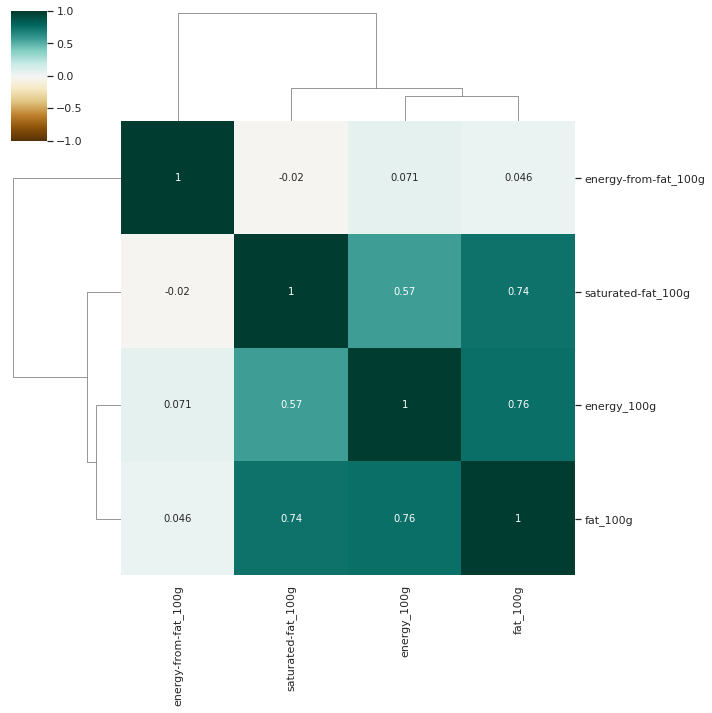

In [ ]:
g = sns.clustermap(dfuse.sample(frac=.01).corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')

In [ ]:
g = sns.fastcluster(dfuse, standard_scale=1)

AttributeError: ignored

In [ ]:
dfuse.shape

In [ ]:
dfuse.sample(frac=.01).shape
